In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.model_selection import train_test_split

import copy
import missingno as msno
import datetime as dt
from dateutil.parser import parse

from tqdm import tqdm

In [2]:
path = './데이터/Product_final.csv'
df_product = pd.read_csv(path, encoding='utf-8')

path = './데이터/Sales_final.csv'
df_sales = pd.read_csv(path, encoding='utf-8' ,index_col = 0)

path = './RFM/rfm_table_334.csv'
RFM = pd.read_csv(path, encoding='utf-8' ,index_col = 0)

C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_product['유기농'] = df_product.apply(lambda row: ((row['물품중분류'] == '생리대') and ('유기농' in row['상품명'])) or ((row['물품중분류'] == '기저귀') and ('네이처메이드' in row['상품명'])), axis = 1)

In [4]:
df_product[(df_product.물품중분류 == '생리대') | (df_product.물품중분류 == '기저귀')].groupby('유기농')['제품단가'].agg('mean')

유기농
False    48812.036053
True     58107.613811
Name: 제품단가, dtype: float64

In [5]:
df_sales.astype({'고객번호': str})
RFM.astype({'고객번호': str});

In [6]:
df_sales2 = pd.merge(df_sales, df_product[['상품명', '물품중분류', '유기농']], on='상품명', how='left')
df_sales2 = pd.merge(df_sales2, RFM[['고객번호', 'grade']], on='고객번호', how='left')

In [7]:
df_sales2[(df_sales2.물품중분류 == '생리대') | (df_sales2.물품중분류 == '기저귀')].groupby('유기농')['결제금액'].agg('sum')

유기농
False    1422446976
True     2037331296
Name: 결제금액, dtype: int64

In [8]:
df_sales2[((df_sales2.grade == '1등급') & (df_sales2.물품중분류 == '생리대')) | ((df_sales2.grade == '1등급') & (df_sales2.물품중분류 == '기저귀'))].groupby('유기농')['결제금액'].agg('sum')

유기농
False    11659314
True     23846228
Name: 결제금액, dtype: int64

In [9]:
df_sales2[((df_sales2.grade == '1등급') & (df_sales2.물품중분류 == '생리대')) | ((df_sales2.grade == '1등급') & (df_sales2.물품중분류 == '기저귀'))].groupby('유기농')['결제금액'].agg('count')

유기농
False    346
True     572
Name: 결제금액, dtype: int64

In [10]:
572/(346+572)

0.6230936819172114

In [11]:
print('1등급 아닌 회원들의 ')
df_sales2[((df_sales2.grade != '1등급') & (df_sales2.물품중분류 == '생리대')) | ((df_sales2.grade != '1등급') & (df_sales2.물품중분류 == '기저귀'))].groupby('유기농')['결제금액'].agg('sum')

1등급 아닌 회원들의 


유기농
False    1410787662
True     2013485068
Name: 결제금액, dtype: int64

In [12]:
df_sales2[((df_sales2.grade != '1등급') & (df_sales2.물품중분류 == '생리대')) | ((df_sales2.grade != '1등급') & (df_sales2.물품중분류 == '기저귀'))].groupby('유기농')['결제금액'].agg('count')

유기농
False    55644
True     51979
Name: 결제금액, dtype: int64

In [13]:
55644/(55644+51979)

0.5170270295382957

In [14]:
data = [55644,51979]
labels = ['일반제품', '유기농제품']

In [15]:
df_sales2

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,배송리드타임,구매일_연도,구매일_월,구매일_일,구매일_요일,할인금액,물품중분류,유기농,grade
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),5,2019,5,6,Monday,9486,수유용품,False,NaN
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),3,2020,2,20,Thursday,13431,기저귀,False,NaN
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,5,2019,2,28,Thursday,1810,휴지/티슈,False,5등급
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),3,2019,5,13,Monday,11598,기저귀,True,4등급
4,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),3,2019,5,13,Monday,11598,기저귀,True,4등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210034,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),3,2020,7,24,Friday,2460,키친타올/행주,False,3등급
210035,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,3,2020,7,29,Wednesday,0,엄청난프로모션,False,3등급
210036,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),4,2020,8,3,Monday,59,기저귀,False,3등급
210037,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,5,2020,8,6,Thursday,0,엄청난프로모션,False,3등급


In [16]:
colors = sns.color_palette('pastel')[0:5]
explode = [0, 0.1]

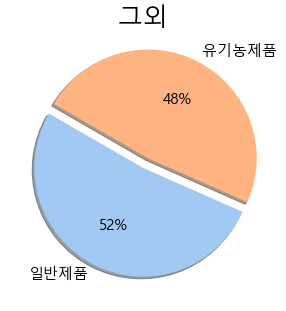

In [17]:
plt.figure(figsize=(5,5))
plt.title(' 그외 ', fontsize=25)
plt.pie(data, labels = labels,
        colors = colors,
        autopct='%.0f%%',shadow=True,
        explode=explode,
        textprops={'fontsize': 15},
       startangle=150);

In [18]:
df_1grade_product = pd.DataFrame(df_sales2[df_sales2.grade == '1등급'].groupby('물품중분류')['주문번호'].agg('count'))

In [19]:
df_1grade_product = df_1grade_product / df_1grade_product.sum()

C:\Users\insea\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


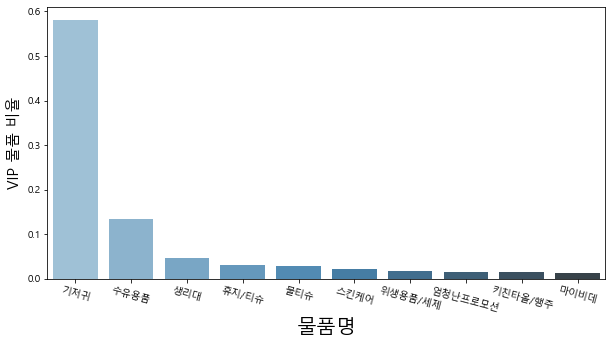

In [28]:
df_1grade_product = df_1grade_product.sort_values('주문번호', ascending =False).head(10)

plt.figure(figsize=(10,5))
plt.xticks(rotation=-15)
plt.xlabel('물품명', fontsize = 20)
plt.ylabel('VIP 물품 비율', fontsize = 15)
#plt.title('[ 기저귀 재구매주기 빈도 ]', fontsize = 20)
g = sns.barplot(list(df_1grade_product.index),list(df_1grade_product['주문번호']), palette="Blues_d");


In [21]:
df_1grade_product

,주문번호
물품중분류,
기저귀,0.580424
수유용품,0.133470
생리대,0.047912
휴지/티슈,0.030801
물티슈,0.029432
스킨케어,0.021903
위생용품/세제,0.018480
엄청난프로모션,0.016427
키친타올/행주,0.015058


In [22]:
df_1grade_organic_dw = pd.DataFrame(df_sales2[(df_sales2.grade == '1등급') & (df_sales2.유기농 == True)].groupby('구매일_요일')['주문번호'].agg('count'))

In [23]:
df_1grade_organic_dw = df_1grade_organic_dw.sort_values('주문번호', ascending=False)
df_1grade_organic_dw

,주문번호
구매일_요일,
Tuesday,106
Friday,96
Wednesday,86
Monday,83
Thursday,75
Sunday,65
Saturday,61


C:\Users\insea\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='요일', ylabel='구매건수'>

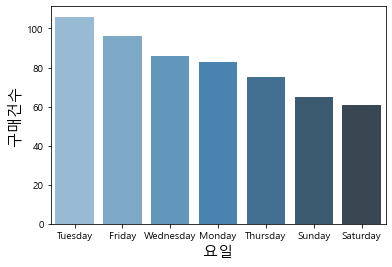

In [24]:
#plt.xticks(rotation=-45)
plt.xlabel('요일', fontsize = 15)
plt.ylabel('구매건수', fontsize = 15)
#plt.title('[ 1등급 오가닉 제품 주요 구매 요일 ]', fontsize = 18)
sns.barplot(list(df_1grade_organic_dw.index), list(df_1grade_organic_dw['주문번호']), palette="Blues_d")

In [25]:
data = [313,535]
labels = ['일반제품', '유기농제품']

In [26]:
colors = sns.color_palette('pastel')[0:5]
explode = [0, 0.1]

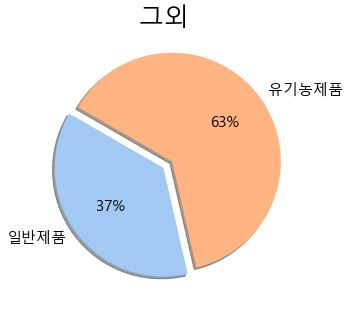

In [27]:
plt.figure(figsize=(5,5))
plt.title(' 그외 ', fontsize=25)
plt.pie(data, labels = labels,
        colors = colors,
        autopct='%.0f%%',shadow=True,
        explode=explode,
        textprops={'fontsize': 15},
       startangle=150);